In [ ]:
import pandas as pd
file_path = '/content/21BCE9274.xlsx'
# Read the Excel file
df = pd.read_excel(file_path)
print(df)

    Rain Fall (mm)  Fertilizer(urea) (kg/acre)  Temperature (°C)  \
0         0.945925                    0.057551          0.017381   
1         0.366551                    0.042101          0.023561   
2         0.961375                    0.053689          0.018154   
3         0.343376                    0.045964          0.022789   
4         0.922750                    0.057551          0.016609   
..             ...                         ...               ...   
94        0.961375                    0.055234          0.017381   
95        0.324063                    0.042101          0.025879   
96        0.938200                    0.056779          0.017381   
97        0.366551                    0.045964          0.023561   
98        0.945925                    0.057551          0.017381   

    Nitrogen (N)  Phosphorus (P)  Potassium (K)  Yeild (Q/acre)  
0       0.057551        0.014291       0.011201        0.005021  
1       0.049826        0.011201       0.009656    

# Random Forest

<ipython-input-6-932ea9895b68>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


MSE = 0.006703330002863151
MAE = 0.06598226801257112
R2 Score = 0.9228867429451888
[[0.07692308]
 [0.84615385]
 [1.        ]
 [0.84615385]
 [0.07692308]
 [0.07692308]
 [0.84615385]
 [0.07692308]
 [0.69230769]
 [0.53846154]
 [0.23076923]
 [0.76923077]
 [0.84615385]
 [0.84615385]
 [0.23076923]
 [0.69230769]
 [0.84615385]
 [0.69230769]
 [0.84615385]
 [0.23076923]
 [0.53846154]
 [0.84615385]
 [0.15384615]
 [0.30769231]
 [0.07692308]
 [0.23076923]
 [0.53846154]
 [0.15384615]
 [1.        ]
 [0.38461538]
 [0.38461538]
 [1.        ]
 [0.84615385]]
[0.08494017 0.81418803 0.95435897 0.72       0.13678632 0.0995812
 0.9        0.25880342 0.74625153 0.31732906 0.3126453  0.85548951
 0.75331002 0.78676353 0.21547009 0.7347265  0.77471306 0.70080708
 0.79876068 0.32304945 0.46391026 0.82305361 0.19128205 0.29692308
 0.17846154 0.20213675 0.70608059 0.21689744 0.9425641  0.34597863
 0.31016667 0.94461538 0.8041453 ]


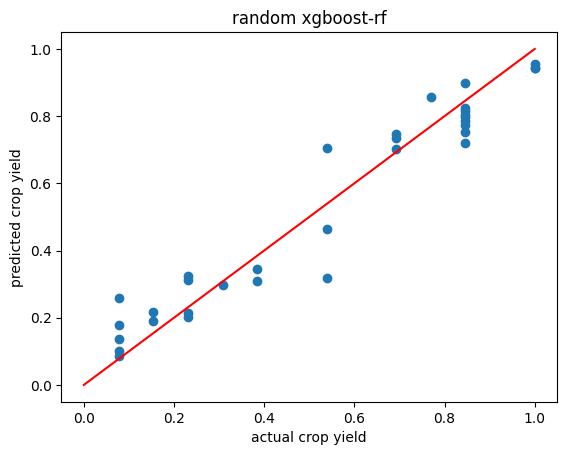

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=df.drop(['Yeild (Q/acre)'],axis=1).values
y=df['Yeild (Q/acre)'].values
min_max_scaler=preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
y=min_max_scaler.fit_transform(y.reshape(-1,1))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=13)#0.33#0.35#0.25
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=12, n_estimators=150)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
print(y_test)
print(y_pred)
plt.plot([0,1],[0,1],color="red")
plt.ylabel('predicted crop yield')
plt.xlabel('actual crop yield')
plt.title('random xgboost-rf')
plt.show()
#pre=regr.predict(X)
#plt.scatter(y,pre)
#print(y)
#print(pre)
#plt.plot([0,1],[0,1],color="green")
#plt.ylabel('predicted crop yield')
#plt.xlabel('actual crop yield')
#plt.title('random forest actual vs predicted')
#plt.show()

# SVR, Gaussian Process with RBF kernel, and MLP/BPNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from openpyxl import load_workbook

# Load the data from the Excel sheet
file_path = '/content/21BCE9274.xlsx'
sheet_name = 'Sheet1'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Split the data into input and output variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the input variables
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# SVR algorithm
regressor_svr = SVR(kernel='rbf')
regressor_svr.fit(X_train, y_train)
y_pred_svr = regressor_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# RBF algorithm
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
regressor_rbf = GaussianProcessRegressor(kernel=kernel, alpha=5e-9)
regressor_rbf.fit(X_train, y_train)
y_pred_rbf = regressor_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)

# BPNN algorithm
regressor_bpnn = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
regressor_bpnn.fit(X_train, y_train)
y_pred_bpnn = regressor_bpnn.predict(X_test)
mse_bpnn = mean_squared_error(y_test, y_pred_bpnn)

# Print the mean squared errors
print('Mean Squared Error (SVR):', mse_svr)
print('Mean Squared Error (RBF):', mse_rbf)
print('Mean Squared Error (BPNN):', mse_bpnn)

# Save the predictions to a new sheet in the Excel file
wb = load_workbook(file_path)
ws = wb.create_sheet('Predictions')
ws.append(['Input 1', 'Input 2', 'Input 3', 'Actual Yield', 'SVR Yield', 'RBF Yield', 'BPNN Yield'])
for i in range(len(X_test)):
    ws.append(list(X_test[i]) + [y_test[i], y_pred_svr[i], y_pred_rbf[i], y_pred_bpnn[i]])
wb.save(file_path)

Mean Squared Error (SVR): 2.0065878741521795e-06
Mean Squared Error (RBF): 4.3456256391593285e-06
Mean Squared Error (BPNN): 0.03110859080353291


# Performance Evaluation of SVR and BPNN Models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
dataset = pd.read_excel('/content/21BCE9274.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the SVR model with linear kernel
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(X_train, y_train)

# Evaluate the SVR model with linear kernel
y_pred_svr = svr_regressor.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Train the SVR model with RBF kernel
rbf_regressor = SVR(kernel='rbf')
rbf_regressor.fit(X_train, y_train)

# Evaluate the SVR model with RBF kernel
y_pred_rbf = rbf_regressor.predict(X_test)
r2_rbf = r2_score(y_test, y_pred_rbf)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(mse_rbf)

# Train the BPNN model
bpnn_regressor = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000)
bpnn_regressor.fit(X_train, y_train)

# Evaluate the BPNN model
y_pred_bpnn = bpnn_regressor.predict(X_test)
r2_bpnn = r2_score(y_test, y_pred_bpnn)
mse_bpnn = mean_squared_error(y_test, y_pred_bpnn)
rmse_bpnn = np.sqrt(mse_bpnn)

# Print the performance metrics
print('SVR (Linear Kernel):')
print('R^2:', r2_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

print('SVR (RBF Kernel):')
print('R^2:', r2_rbf)
print('MSE:', mse_rbf)
print('RMSE:', rmse_rbf)

print('BPNN:')
print('R^2:', r2_bpnn)
print('MSE:', mse_bpnn)
print('RMSE:', rmse_bpnn)


SVR (Linear Kernel):
R^2: -0.00018590816136820898
MSE: 2.0065878741521795e-06
RMSE: 0.0014165408127379104
SVR (RBF Kernel):
R^2: -0.00018590816136820898
MSE: 2.0065878741521795e-06
RMSE: 0.0014165408127379104
BPNN:
R^2: -20086.212053667976
MSE: 0.04029926417030726
RMSE: 0.2007467662760904


## Visualization of Actual vs. Predicted Crop Yield for SVR Model

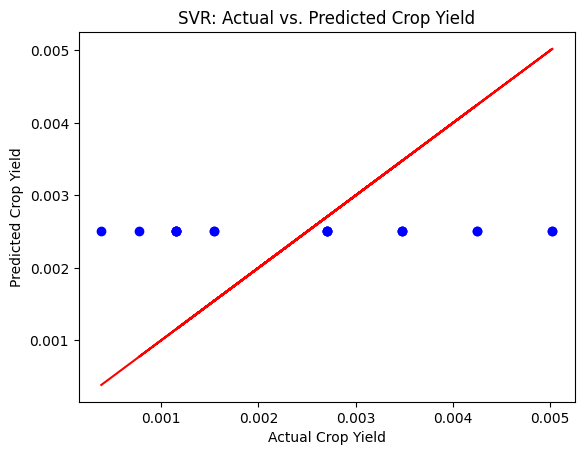

In [ ]:
import matplotlib.pyplot as plt
# Plot the actual and predicted crop yield for SVR
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('SVR: Actual vs. Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.show()

# Visualization of Actual vs. Predicted Crop Yield for RBF Model

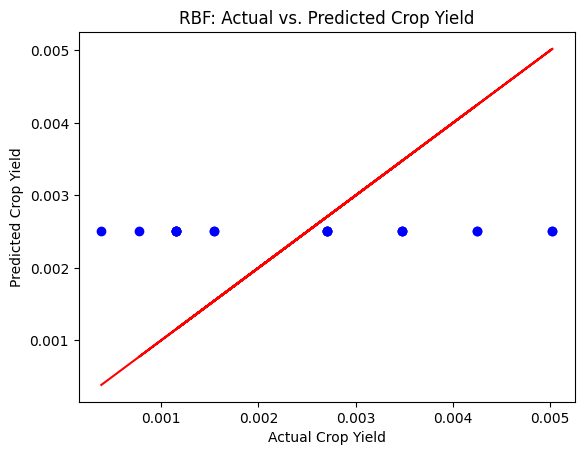

In [ ]:
# Plot the actual and predicted crop yield for RBF
plt.scatter(y_test, y_pred_rbf, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('RBF: Actual vs. Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.show()

# Visualization of Actual vs. Predicted Crop Yield for BPNN Model

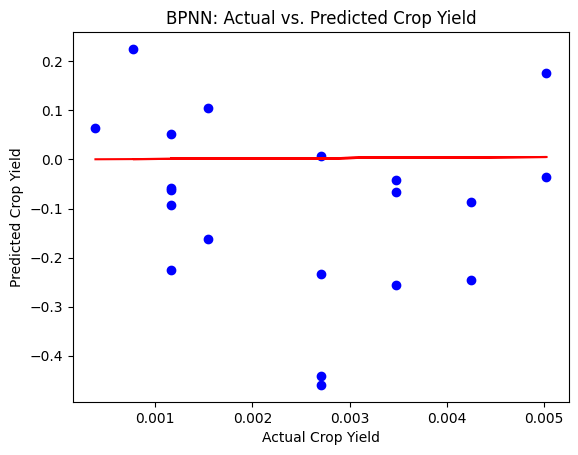

In [ ]:
# Plot the actual and predicted crop yield for BPNN
plt.scatter(y_test, y_pred_bpnn, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('BPNN: Actual vs. Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.show()

# Model Predictions

In [ ]:
print(y_pred_svr,y_pred_rbf,y_pred_bpnn)

[0.00251062 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062
 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062
 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062
 0.00251062 0.00251062] [0.00251062 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062
 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062
 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062 0.00251062
 0.00251062 0.00251062] [ 0.0638764  -0.04141571 -0.08710547 -0.16191922  0.10458656 -0.23358517
  0.1760731  -0.2247782  -0.06566615  0.00750859  0.22543201  0.05128398
 -0.25695025 -0.44184577 -0.09314319 -0.24627891 -0.05911803 -0.45975154
 -0.06301737 -0.03508428]
